In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("train.csv")

cont_sample_multidim = []
sample_points = np.random.randint(150000, len(data) + 1, 1000)

for point in sample_points:
    new_point_X = []
    temp = pd.DataFrame(data.iloc[point])
    new_point_y = temp.loc['time_to_failure'].to_list()[0]
    
    for i in range(150000):
        temp = pd.DataFrame(data.iloc[point - i])
        temp = temp.loc['acoustic_data'].to_list()[0]
        new_point_X.append(temp)
    
    cont_sample_multidim.append([new_point_X, new_point_y])

X = []
y = []
for i in range(len(cont_sample_multidim)):
    X.append(cont_sample_multidim[i][0])
    y.append(cont_sample_multidim[i][1])

pd.DataFrame(X).to_csv("rand_mdim_sample_100_X", index=False)
pd.DataFrame(y).to_csv("rand_mdim_sample_100_y", index=False)

best_score = np.infty

print("Done sampling")
print("\nStart KNN")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

results = []

for k in [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 400, 500]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_test = knn.predict(X_test)
    score = root_mean_squared_error(y_pred_test, y_test)
    results.append([k, score])
    if score < best_score:
        best_score = score

print(results)

print("\nStart LR")
results = []

for i in range(5):#10):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_test = lr.predict(X_test)
    score = root_mean_squared_error(y_pred_test, y_test)
    results.append([i, score])
    if score < best_score:
        best_score = score

print(results)

print("\nStart SVR")
results = []

for e in [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1]:#10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 400, 500]:
    for c in [0.001, 0.01, 0.1, 1, 10, 20, 50, 100, 1000]:
        regr = make_pipeline(StandardScaler(), SVR(C=c, epsilon=e))
        regr.fit(X, y)
        y_pred_test = regr.predict(X_test)
        score = root_mean_squared_error(y_pred_test, y_test)
        results.append([e, c, score])
        if score < best_score:
            best_score = score

print(results)

print("best score: ", best_score)


In [ ]:
print("\nStart SVR")
best_score = 0
results = []

for e in [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1]:
    for c in [0.001, 0.01, 0.1, 1, 10, 20, 50, 100, 1000]:
        regr = make_pipeline(StandardScaler(), SVR(C=c, epsilon=e))
        regr.fit(X, y)
        y_pred_test = regr.predict(X_test)
        score = mean_squared_error(y_pred_test, y_test, squared=False)
        results.append([e, c, score])
        if score < best_score:
            best_score = score

print(results)

print("best score: ", best_score)

In [ ]:
X = pd.read_csv("rand_mdim_sample_100_X", index_col=False)
y = pd.read_csv("rand_mdim_sample_100_y", index_col=False)

In [17]:

print("Start Program")
X_150kdim = []
X_sum = []
X_avg = []

for i in range(len(X)):
    X_sum.append([sum( X.iloc[i].to_list() ), X.iloc[i].to_list()[150000-1]])
    X_avg.append([ (X_sum[i][0]/len( X.iloc[1].to_list() ) ), X.iloc[i].to_list()[150000-1]] )
    X_150kdim.append(X.iloc[i].to_list())

#pd.DataFrame(X_sum).to_csv("rand_mdim_sample_100_X_sum", index=False)
#pd.DataFrame(X_avg).to_csv("rand_mdim_sample_100_X_avg", index=False)

print("Done making arrays")

best_score = np.infty

print("\nStart KNN")

X_train, X_test, y_train, y_test = train_test_split(X_sum, y, test_size=0.20, random_state=0)

results = []

for k in [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 400, 500]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_test = knn.predict(X_test)
    score = mean_squared_error(y_pred_test, y_test, squared=False)
    results.append([k, score])
    if score < best_score:
        best_score = score

print(results)

print("\nStart LR")
results = []

for i in range(5):#10):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_test = lr.predict(X_test)
    score = mean_squared_error(y_pred_test, y_test, squared=False)
    results.append([i, score])
    if score < best_score:
        best_score = score

print(results)

print("\nStart SVR")
results = []

for e in [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1]:#10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 400, 500]:
    for c in [0.001, 0.01, 0.1, 1, 10, 20, 50, 100, 1000]:
        regr = make_pipeline(StandardScaler(), SVR(C=c, epsilon=e))
        regr.fit(X_train, y_train)
        y_pred_test = regr.predict(X_test)
        score = mean_squared_error(y_pred_test, y_test, squared=False)
        results.append([e, c, score])
        if score < best_score:
            best_score = score

print(results)

print("best score sum method: ", best_score)




best_score = np.infty

print("\nStart KNN")

X_train, X_test, y_train, y_test = train_test_split(X_avg, y, test_size=0.20, random_state=0)

results = []

for k in [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 400, 500]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_test = knn.predict(X_test)
    score = mean_squared_error(y_pred_test, y_test, squared=False)
    results.append([k, score])
    if score < best_score:
        best_score = score

print(results)

print("\nStart LR")
results = []

for i in range(5):#10):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_test = lr.predict(X_test)
    score = mean_squared_error(y_pred_test, y_test, squared=False)
    results.append([i, score])
    if score < best_score:
        best_score = score

print(results)

print("\nStart SVR")
results = []

for e in [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1]:#10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 400, 500]:
    for c in [0.001, 0.01, 0.1, 1, 10, 20, 50, 100, 1000]:
        regr = make_pipeline(StandardScaler(), SVR(C=c, epsilon=e))
        regr.fit(X_train, y_train)
        y_pred_test = regr.predict(X_test)
        score = mean_squared_error(y_pred_test, y_test, squared=False)
        results.append([e, c, score])
        if score < best_score:
            best_score = score

print(results)

print("best score avg method: ", best_score)




best_score = np.infty
results = []
X_train, X_test, y_train, y_test = train_test_split(X_150kdim, y, test_size=0.20, random_state=0)

for k in [100, 150, 200, 250, 300, 400, 500]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_test = knn.predict(X_test)
    score = mean_squared_error(y_pred_test, y_test, squared=False)
    results.append([k, score])
    if score < best_score:
        best_score = score

print(results)

print("\nStart LR")
results = []

for i in range(5):#10):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_test = lr.predict(X_test)
    score = mean_squared_error(y_pred_test, y_test, squared=False)
    results.append([i, score])
    if score < best_score:
        best_score = score

print(results)

print("\nStart SVR")
results = []

for e in [0.000001, 0.00001, 0.01, 0.1, 1]:
    for c in [0.001, 1, 10, 20, 100]:
        regr = make_pipeline(StandardScaler(), SVR(C=c, epsilon=e))
        regr.fit(X_train, y_train)
        y_pred_test = regr.predict(X_test)
        score = mean_squared_error(y_pred_test, y_test, squared=False)
        results.append([e, c, score])
        if score < best_score:
            best_score = score

print(results)

print("best score 150kdim method: ", best_score)

Start Program
Done making arrays

Start KNN


/Users/imac/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/imac/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/imac/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/imac/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6

[[1, 5.066587442321551], [5, 3.847156937838705], [10, 3.608748520969683], [20, 3.451007927472232], [30, 3.4373211591501396], [40, 3.436955233084578], [50, 3.454974356541806], [60, 3.4476003271615174], [70, 3.4431189311647166], [80, 3.4296991433506054], [90, 3.429485064577802], [100, 3.423882449245681], [150, 3.4191455674367752], [200, 3.4155745794209986], [250, 3.410946492129943], [300, 3.4141277020731233], [400, 3.3986749683840043], [500, 3.403604097279311]]

Start LR
[[0, 3.4185259678631255], [1, 3.4185259678631255], [2, 3.4185259678631255], [3, 3.4185259678631255], [4, 3.4185259678631255]]

Start SVR


/Users/imac/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/imac/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/imac/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/imac/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[[1e-06, 0.001, 3.4122948769261265], [1e-06, 0.01, 3.407826286124753], [1e-06, 0.1, 3.3940284426020297], [1e-06, 1, 3.430444360404992], [1e-06, 10, 3.4853255722857956], [1e-06, 20, 3.515876776722751], [1e-06, 50, 3.5179638705892433], [1e-06, 100, 3.5571442711678674], [1e-06, 1000, 3.5879949809871565], [1e-05, 0.001, 3.4122948769261265], [1e-05, 0.01, 3.407826286124753], [1e-05, 0.1, 3.3940281409950592], [1e-05, 1, 3.430429778856267], [1e-05, 10, 3.485325998792862], [1e-05, 20, 3.5158560484512886], [1e-05, 50, 3.517999581249665], [1e-05, 100, 3.5571373994815123], [1e-05, 1000, 3.5875656999344305], [0.0001, 0.001, 3.4122948769261265], [0.0001, 0.01, 3.407826286124753], [0.0001, 0.1, 3.3940268875472914], [0.0001, 1, 3.4304327669127175], [0.0001, 10, 3.4853788107523607], [0.0001, 20, 3.5158581523145744], [0.0001, 50, 3.5180477250898323], [0.0001, 100, 3.5571691444091695], [0.0001, 1000, 3.587914744346863], [0.001, 0.001, 3.4122948769261265], [0.001, 0.01, 3.4078828384334217], [0.001, 0.1, 

/Users/imac/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/imac/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/imac/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/imac/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[[1e-06, 0.001, 3.4122948769261265], [1e-06, 0.01, 3.407826286124753], [1e-06, 0.1, 3.3940284426020297], [1e-06, 1, 3.430444360404992], [1e-06, 10, 3.4853255722857885], [1e-06, 20, 3.51587677672274], [1e-06, 50, 3.517963870589222], [1e-06, 100, 3.5571442711678225], [1e-06, 1000, 3.5879949809868203], [1e-05, 0.001, 3.4122948769261265], [1e-05, 0.01, 3.407826286124753], [1e-05, 0.1, 3.3940281409950592], [1e-05, 1, 3.430429778856267], [1e-05, 10, 3.4853259987928538], [1e-05, 20, 3.5158560484512797], [1e-05, 50, 3.517999581249652], [1e-05, 100, 3.55713739948147], [1e-05, 1000, 3.5875656999342844], [0.0001, 0.001, 3.4122948769261265], [0.0001, 0.01, 3.407826286124753], [0.0001, 0.1, 3.394026887547292], [0.0001, 1, 3.4304327669127175], [0.0001, 10, 3.4853788107523513], [0.0001, 20, 3.5158581523145647], [0.0001, 50, 3.5180477250898012], [0.0001, 100, 3.5571691444091553], [0.0001, 1000, 3.5879147443466244], [0.001, 0.001, 3.4122948769261265], [0.001, 0.01, 3.4078828384334217], [0.001, 0.1, 3.3

/Users/imac/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/imac/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/imac/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/imac/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6

[[100, 5.2514886325315855], [150, 5.043274094288737], [200, 4.784183077315011], [250, 4.628854538092079], [300, 4.4354066128483085], [400, 4.054459686881869], [500, 3.8222710204387775]]

Start LR


/Users/imac/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/imac/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/imac/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/imac/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6

[[0, 3.78313653388658], [1, 3.78313653388658], [2, 3.78313653388658], [3, 3.78313653388658], [4, 3.78313653388658]]

Start SVR


/Users/imac/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/imac/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/imac/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/imac/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed 

[[1e-06, 0.001, 3.403873818707314], [1e-06, 1, 2.736162319761698], [1e-06, 10, 2.743477221392635], [1e-06, 20, 2.735655637061965], [1e-06, 100, 2.734138266696621], [1e-05, 0.001, 3.403873818707314], [1e-05, 1, 2.7361621543634955], [1e-05, 10, 2.7434841454394765], [1e-05, 20, 2.7356631255511443], [1e-05, 100, 2.7341366913907716], [0.01, 0.001, 3.403945402632655], [0.01, 1, 2.7359967024578644], [0.01, 10, 2.7432798453861946], [0.01, 20, 2.735404641658626], [0.01, 100, 2.7338741909166875], [0.1, 0.001, 3.403399940040672], [0.1, 1, 2.733959993685691], [0.1, 10, 2.741094798518443], [0.1, 20, 2.7328027752866864], [0.1, 100, 2.731409220797715], [1, 0.001, 3.402836391486078], [1, 1, 2.713774396043096], [1, 10, 2.7188882238429715], [1, 20, 2.7102151149353495], [1, 100, 2.709960559390872]]
best score 150kdim method:  2.709960559390872


/Users/imac/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
temp = pd.read_csv("rand_mdim_sample_100_X", index_col=False)

In [ ]:
len(temp.iloc[0].to_list())

In [ ]:
len(data)

In [ ]:
data.tail()

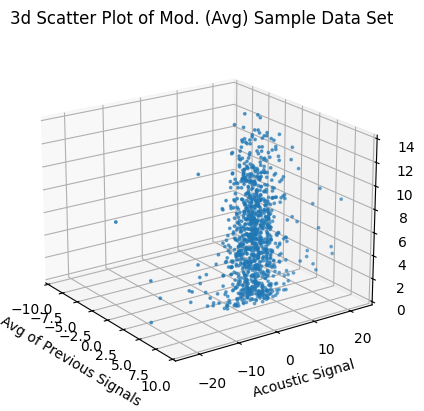

In [52]:
# Extracting the first column
first_column = [row[0] for row in X_avg]
second_column = [row[1] for row in X_avg]


import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure().add_subplot(projection='3d')

# Plot scatterplot data (20 2D points per colour) on the x and z axes.
colors = ('r', 'g', 'b', 'k')

# Fixing random state for reproducibility
np.random.seed(19680801)


y = pd.read_csv("rand_mdim_sample_100_y", index_col=False)
c_list = []
for c in colors:
    c_list.extend([c] * len(first_column))
# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x, y) points are plotted on the x and z axes.
ax.scatter(first_column, y, second_column, zdir='y',label='points in (x, z)', s=3)
ax.set_title("3d Scatter Plot of Mod. (Avg) Sample Data Set")
# Make legend, set axes limits and labels
#ax.legend()
ax.set_xlim(-10, 10)
ax.set_ylim(-25, 25)
ax.set_zlim(0, 14)
ax.set_xlabel('Avg of Previous Signals')
ax.set_ylabel('Acoustic Signal')
ax.set_zlabel('Time to Failure')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=20., azim=-35, roll=0)

plt.show()

In [35]:
min(y)

'0'